In [83]:
import pydev
import matplotlib.pyplot as plt

fd = file('data/session.stat.out.20181121')
session_disp = []
session_ctr = []
session_dur = []
session = []

user_set = set()

for row in pydev.foreach_row(fd):
    user, click, disp, ctr, dur, _, _ = row
    user_set.add(user)
    click = int(click)
    disp = int(disp)
    dur = int(dur)
    ctr = float(ctr)

    session.append( (click, disp, dur, ctr) )
    session_disp.append(disp)
    session_ctr.append(ctr)
    session_dur.append(dur)

clicked_session = filter(lambda x:x[0]>0, session)
unclicked_session = filter(lambda x:x[0]==0, session)

print 'user:%d' % (len(user_set))
print 'session:%d' % (len(session))
print 'ClickedSession: %d (%.2f%%)' %(len(clicked_session), len(clicked_session)*100./len(session))
print 'session per user: %.2f' %( len(session) * 1. / len(user_set))

    
# aux function for stat.
def F_Dur(d): return filter(lambda x:x[2]<=d, session)
def F_Disp(d): return filter(lambda x:x[1]<=d, session)
def N(d): return len(F(d))
def Clk(d,F=F_Dur): return sum(map(lambda x:x[0], F(d)))
def Dsp(d,F=F_Dur): return sum(map(lambda x:x[1], F(d)))
def Dur(d,F=F_Dur): return sum(map(lambda x:x[2], F(d)))
    

print 'avg disp of long session(>1800): %.3f' % (Dsp(1800)*1. / N(1800))
print 'avg duration of each disp: %.3f' % (sum(session_dur) / sum(session_disp))
print 'avg duration of each disp (>1800): %.3f' % (Dur(1800)*1./Dsp(1800))



user:65243
session:161814
ClickedSession: 80721 (49.89%)
session per user: 2.48
avg disp of long session(>1800): 120.110
avg duration of each disp: 24.000
avg duration of each disp (>1800): 17.605


In [84]:

# Session disp distribution
import data_analysis as DA

unclieked_disp_dist = DA.bucket_distribution(map(lambda x:x[1], unclicked_session), 0, 5)[:20]
clicked_disp_dist = DA.bucket_distribution(map(lambda x:x[1], clicked_session), 0, 5)[:20]

for idx in range(len(disp_dist)):
    beg, end, count, ratio = unclieked_disp_dist[idx]
    _, _, click_count, click_ratio = clicked_disp_dist[idx]
    print 'Disp in [%d, %d) UnclickedSession: %d(%.1f%%), ClickedSession: %d(%.1f%%)' %(
            beg, end, count, ratio*100., click_count, click_ratio*100.)


Disp in [0, 5) UnclickedSession: 60715(74.9%), ClickedSession: 9345(11.6%)
Disp in [5, 10) UnclickedSession: 16098(19.9%), ClickedSession: 14425(17.9%)
Disp in [10, 15) UnclickedSession: 1840(2.3%), ClickedSession: 9365(11.6%)
Disp in [15, 20) UnclickedSession: 792(1.0%), ClickedSession: 6743(8.4%)
Disp in [20, 25) UnclickedSession: 531(0.7%), ClickedSession: 5967(7.4%)
Disp in [25, 30) UnclickedSession: 275(0.3%), ClickedSession: 4374(5.4%)
Disp in [30, 35) UnclickedSession: 189(0.2%), ClickedSession: 3429(4.2%)
Disp in [35, 40) UnclickedSession: 120(0.1%), ClickedSession: 2934(3.6%)
Disp in [40, 45) UnclickedSession: 99(0.1%), ClickedSession: 2521(3.1%)
Disp in [45, 50) UnclickedSession: 68(0.1%), ClickedSession: 2067(2.6%)
Disp in [50, 55) UnclickedSession: 56(0.1%), ClickedSession: 1728(2.1%)
Disp in [55, 60) UnclickedSession: 38(0.0%), ClickedSession: 1609(2.0%)
Disp in [60, 65) UnclickedSession: 29(0.0%), ClickedSession: 1363(1.7%)
Disp in [65, 70) UnclickedSession: 23(0.0%), Cli

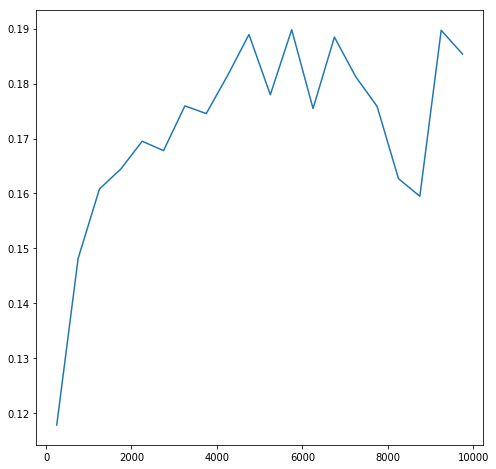

Disp between [0,100) : 153354 （94.8%）
Disp between [100,200) : 6114 （3.8%）
Disp between [200,300) : 1292 （0.8%）
Disp between [300,400) : 491 （0.3%）
Disp between [400,500) : 235 （0.1%）
Disp between [500,600) : 120 （0.1%）
Disp between [600,700) : 81 （0.1%）
Disp between [700,800) : 46 （0.0%）
Disp between [800,900) : 33 （0.0%）
Disp between [900,1000) : 11 （0.0%）


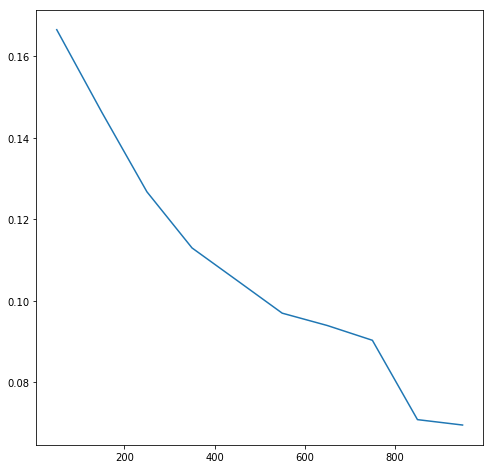

Disp between [0,5) : 83167 （51.4%）
Disp between [5,10) : 20189 （12.5%）
Disp between [10,15) : 10157 （6.3%）
Disp between [15,20) : 7184 （4.4%）
Disp between [20,25) : 6222 （3.8%）
Disp between [25,30) : 4310 （2.7%）
Disp between [30,35) : 3494 （2.2%）
Disp between [35,40) : 2974 （1.8%）
Disp between [40,45) : 2549 （1.6%）
Disp between [45,50) : 2029 （1.3%）
Disp between [50,55) : 1746 （1.1%）
Disp between [55,60) : 1602 （1.0%）
Disp between [60,65) : 1376 （0.9%）
Disp between [65,70) : 1222 （0.8%）
Disp between [70,75) : 1154 （0.7%）
Disp between [75,80) : 1002 （0.6%）
Disp between [80,85) : 894 （0.6%）
Disp between [85,90) : 763 （0.5%）
Disp between [90,95) : 722 （0.4%）
Disp between [95,100) : 598 （0.4%）


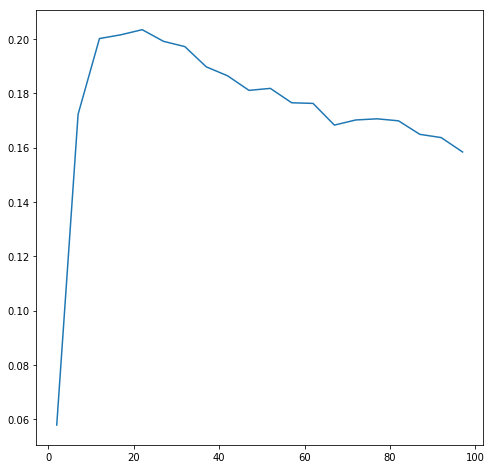

In [73]:

# ctr trend on duration increasing.
ctr_on_dur = []
x_labels=[]

interval=500
for x in range(0, 10000, interval):
    ctr_on_dur.append( (Clk(x+interval)-Clk(x))*1. / (Dsp(x+interval)-Dsp(x)) )
    x_labels.append(x+interval/2)
    
plt.figure(figsize=(8,8))
plt.plot(x_labels, ctr_on_dur)
plt.show()


# ctr trend on DispCount increasing.
ctr_on_disp = []
ctr_on_disp_counter = []
x_labels=[]

interval=100
for x in range(0, 1000, interval):
    ctr_on_disp.append( (Clk(x+interval,F_Disp)-Clk(x,F_Disp))*1. / (Dsp(x+interval,F_Disp)-Dsp(x,F_Disp)) )
    
    n = len(F_Disp(x+interval)) - len(F_Disp(x))
    print 'Disp between [%d,%d) : %d （%.1f%%）' % (x, x+interval, n, n*100./len(session))
    ctr_on_disp_counter.append( n )
    x_labels.append(x+interval/2)

plt.figure(figsize=(8,8))
plt.plot(x_labels, ctr_on_disp)
#plt.bar(range(len(ctr_on_disp_counter)), ctr_on_disp_counter)
plt.show()


# ctr trend on DispCount increasing. (in 100 disp.)
ctr_on_disp = []
ctr_on_disp_counter = []
x_labels=[]
interval=5
for x in range(0, 100, interval):
    ctr_on_disp.append( (Clk(x+interval,F_Disp)-Clk(x,F_Disp))*1. / (Dsp(x+interval,F_Disp)-Dsp(x,F_Disp)) )
    
    n = len(F_Disp(x+interval)) - len(F_Disp(x))
    print 'Disp between [%d,%d) : %d （%.1f%%）' % (x, x+interval, n, n*100./len(session))
    ctr_on_disp_counter.append( n )
    x_labels.append(x+interval/2)

plt.figure(figsize=(8,8))
plt.plot(x_labels, ctr_on_disp)
#plt.bar(range(len(ctr_on_disp_counter)), ctr_on_disp_counter)
plt.show()

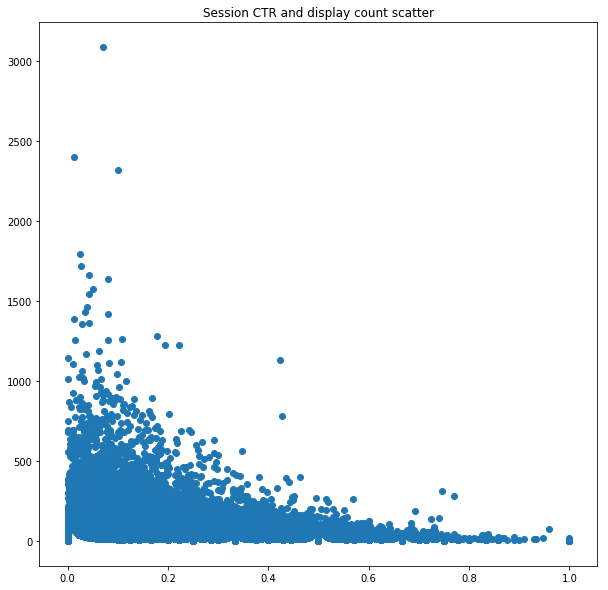

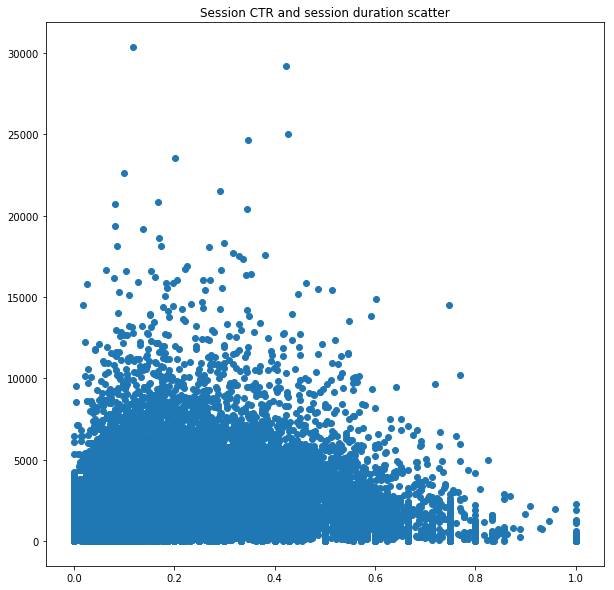

In [62]:

plt.figure(figsize=(10,10))
plt.scatter(session_ctr, session_disp)
plt.title('Session CTR and display count scatter')
plt.show()


plt.figure(figsize=(10,10))
plt.scatter(session_ctr, session_dur)
plt.title('Session CTR and session duration scatter')
plt.show()



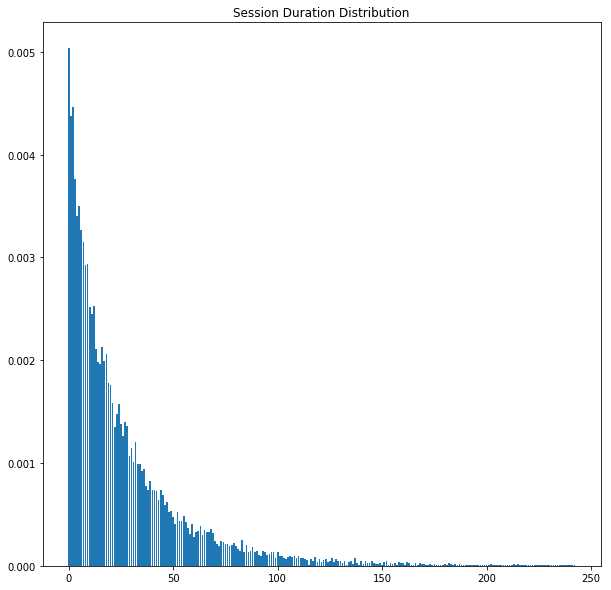

In [31]:
import data_analysis as da


session_dur_dist = da.bucket_distribution(session_dur, 0, 60)[30:]

plt.figure(figsize=(10,10))
plt.bar(range(len(session_dur_dist)), map(lambda x:x[3], session_dur_dist))
plt.title('Session Duration Distribution')
plt.show()

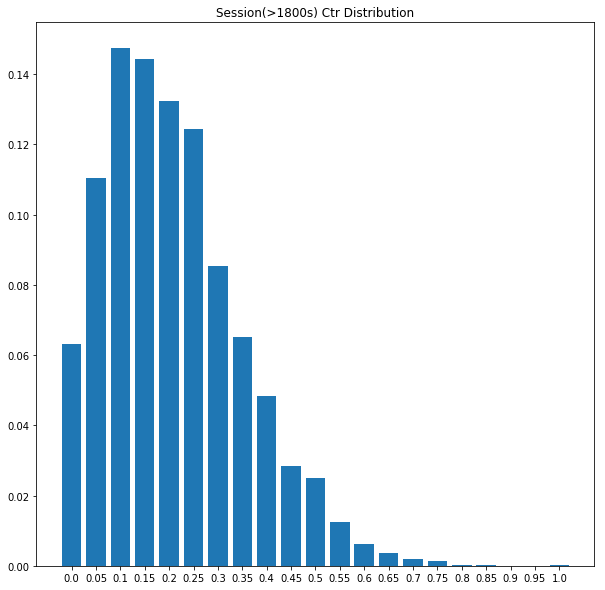

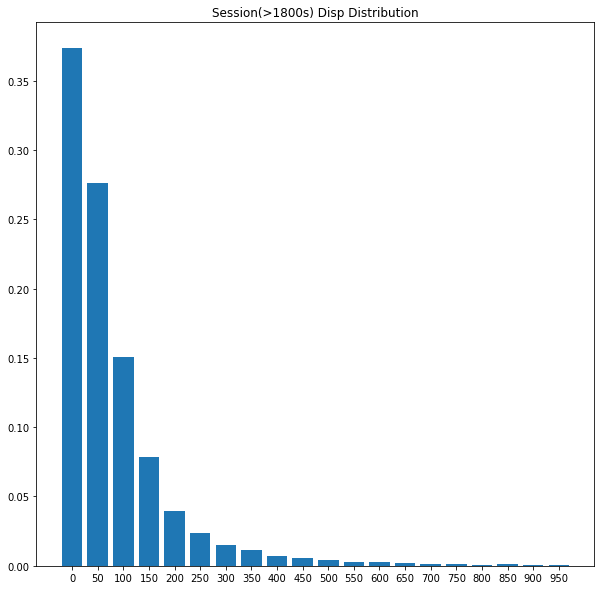

In [28]:

limit_time = 1800



# dur and ctr
data = map(lambda x:x[3], filter(lambda x:x[2]>limit_time, session))
ctr_dist = da.bucket_distribution(data, 0, 0.05)

plt.figure(figsize=(10,10))
xticks = map(lambda x:x[0], ctr_dist)
plt.xticks(range(len(ctr_dist)), xticks)
plt.bar(range(len(ctr_dist)), map(lambda x:x[3], ctr_dist))
plt.title('Session(>%ds) Ctr Distribution' % limit_time)
plt.show()

# dur and display count.
data = map(lambda x:x[1], filter(lambda x:x[2]>limit_time, session))
disp_dist = da.bucket_distribution(data, 0, 50)[:20]

plt.figure(figsize=(10,10))
xticks = map(lambda x:x[0], disp_dist)
plt.xticks(range(len(disp_dist)), xticks)
plt.bar(range(len(disp_dist)), map(lambda x:x[3], disp_dist))
plt.title('Session(>%ds) Disp Distribution' % limit_time)
plt.show()